In [1]:
import sys
print(sys.executable)
print(sys.version)

/home/kshitij98/getNeighbours/venv/bin/python3
3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]


In [2]:
from ipynb.fs.full.Helper import getDataLoader
from ipynb.fs.full.GramMatrix import convertModel

import torch
import torch.nn as nn

%matplotlib inline

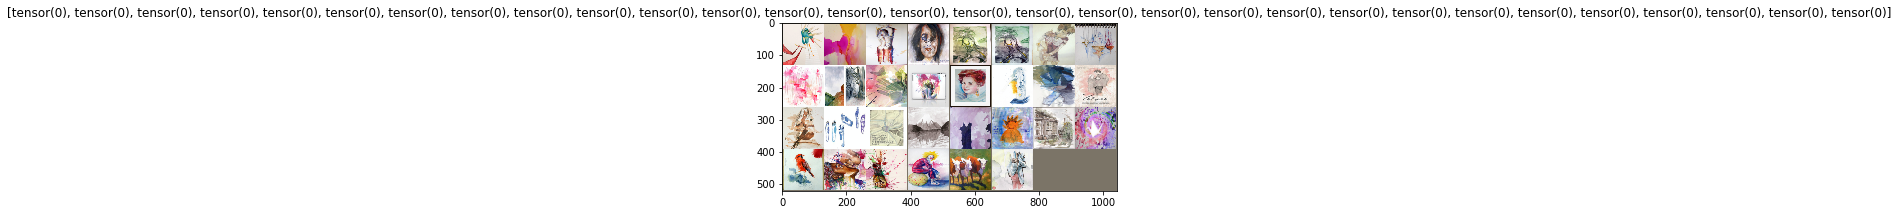

In [3]:
loader = getDataLoader('/scratch/bam_subset_2_0', batch_size=30, shuffle=False, num_workers=20, testing=True)

In [4]:
import torchvision.models as models
vgg19 = models.vgg19(pretrained=True)

In [5]:
gramMatrixLayers = ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1']
vgg19, model, gram_matrices = convertModel(vgg19, gramMatrixLayers, testing=False)

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model.eval()

if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs")
    model = nn.DataParallel(model)

model.to(device)

cuda:0
Using 2 GPUs


tensor([[[[ 2.3140,  0.0000,  0.0000,  ...,  0.3640,  0.3633,  0.0000],
          [ 3.3741,  0.5227,  2.8691,  ...,  4.8565, 10.6414,  0.0000],
          [ 2.4329,  0.0000,  0.3459,  ...,  0.0000,  3.1740,  0.0000],
          ...,
          [ 6.9681,  5.5931,  0.0000,  ...,  0.0000,  4.8912,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 3.6557,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  8.9476],
          [ 3.7501,  0.0000,  0.0000,  ...,  0.0000,  0.0000, 17.2681],
          [ 4.0954,  0.0000,  1.8152,  ...,  0.0000,  0.0000, 12.1659],
          ...,
          [15.1122,  0.0000,  0.0000,  ...,  0.0000,  9.1608, 14.3188],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, 22.4925],
          [ 2.8408,  0.0000,  0.0000,  ...,  0.7040,  2.3444, 18.6987]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 3.6479,  2.6077,  

In [ ]:
dataIter = iter(loader)
data, classes = dataIter.next()
model(data)


In [8]:
print(len(gram_matrices))

for gm in gram_matrices:
    print(gm.gramMatrix.shape)


4


AttributeError: 'GramMatrixLayer' object has no attribute 'gramMatrix'